In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [18]:
data = pd.read_csv('bank-additional.csv', sep=';')


In [19]:
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [20]:
data.isnull().sum()


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


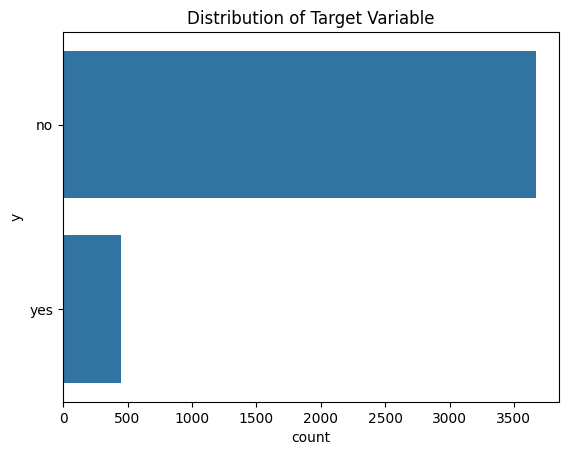

In [21]:
sns.countplot(data['y'])
plt.title('Distribution of Target Variable')
plt.show()


In [22]:
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome']

data = pd.get_dummies(data, columns=categorical_vars, drop_first=True)

le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])


In [23]:
X = data.drop('y', axis=1)
y = data['y']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [26]:
y_pred = clf.predict(X_test)


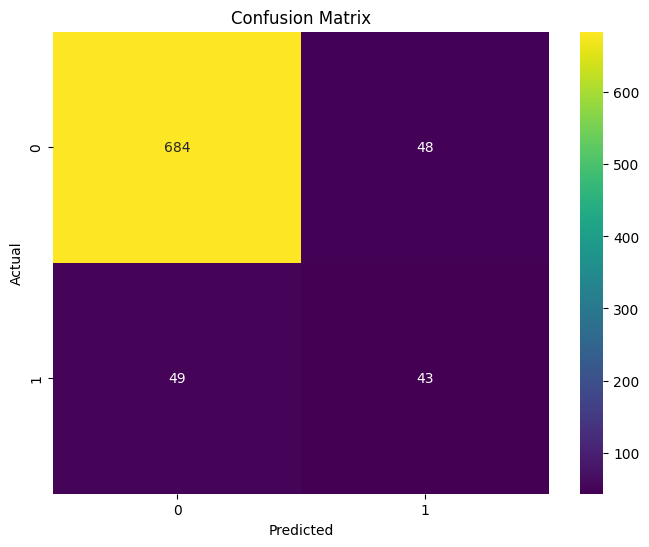

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       732
           1       0.47      0.47      0.47        92

    accuracy                           0.88       824
   macro avg       0.70      0.70      0.70       824
weighted avg       0.88      0.88      0.88       824



In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy*100:.2f}%")


Accuracy of the model: 88.23%


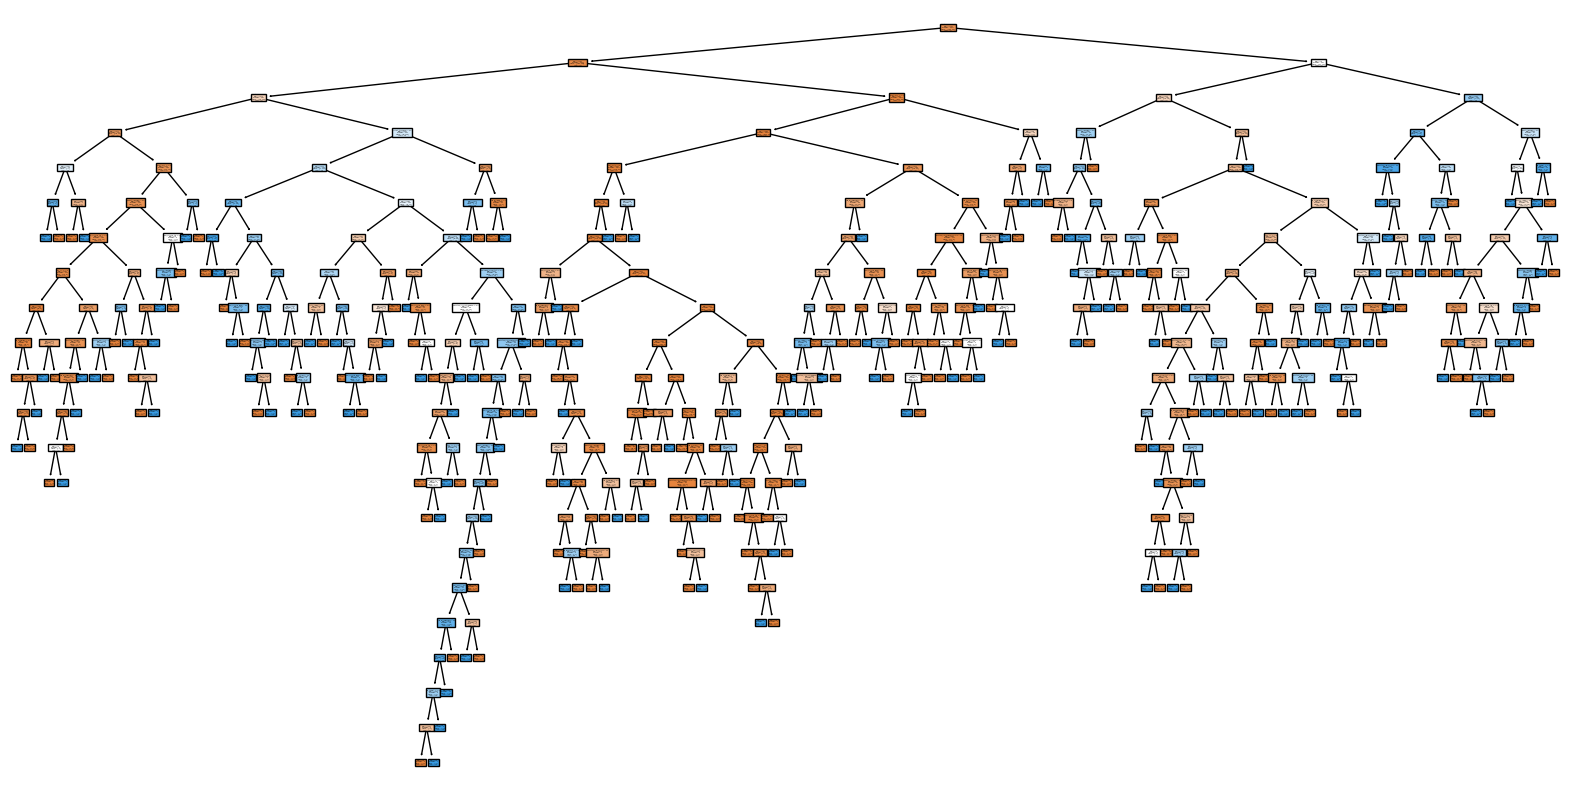

In [42]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No','Yes'], filled=True )
plt.show()


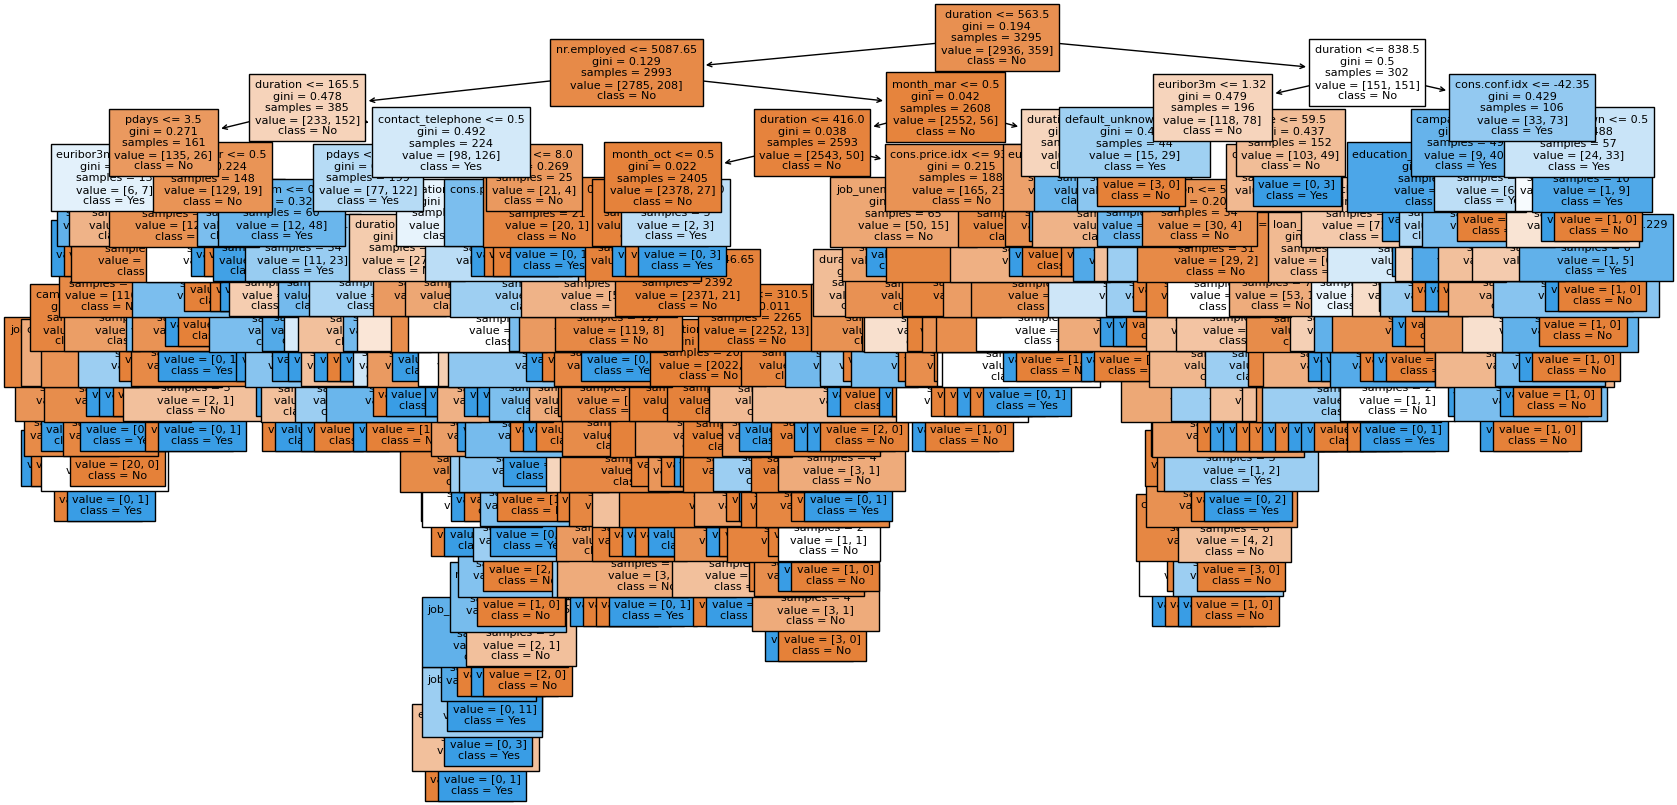

In [41]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No','Yes'], filled=True  ,  fontsize=8)
plt.show()
